<a href="https://colab.research.google.com/github/nadnein/AI_Biomedicine_Project/blob/main/final_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final assignment: Create a classifier for x-ray images

#Acessing the data:


1.   Click On the link https://drive.google.com/drive/folders/1KS4tFoB1SZU6HLhm0pfMPmtNOOrFB1Az?usp=share_link
2.   Right click on the name of the folder
3.   Select add shortcut to the folder My Drive


# Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Data loading and analysis**

I thought we could maybe use this a bit: https://www.section.io/engineering-education/image-preprocessing-in-python/


In [2]:
import zipfile

# unzip files 
zip = zipfile.ZipFile(r'/content/drive/MyDrive/AI_in_biomedicine/final_assignment/train_set.zip')
zip.extractall('/content/drive/MyDrive/AI_in_biomedicine/final_assignment')
zip.close()

In [2]:
# importing libraries
import tensorflow 
import keras  
import os
import glob 
from skimage import io 
import random 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# loading files

dataset_path = '/content/drive/MyDrive/AI_in_biomedicine/final_assignment/train'
class_names = ['normal', 'tbc', 'pneumonia']
csv_path = os.path.join(dataset_path, 'labels_train.csv')
labels = pd.read_csv(csv_path)  

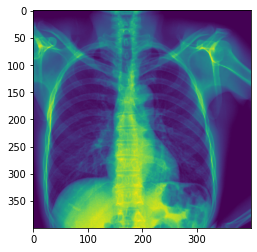

In [9]:
image_paths = []
for file in os.listdir(dataset_path):
     if file.endswith(".png"): 
         # accessing an image file from the dataset classes
         file_path = os.path.join(dataset_path, file)
         image_paths.append(file_path)
         

# load one of the images 
image = io.imread(image_paths[1])

# plotting the original image
i, (im1) = plt.subplots(1)
i.set_figwidth(15)
im1.imshow(image)



In [16]:
image[:, 1]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         1,   3,   4,   6,   7,   9,  11,  13,  17,  27,  33,  43,  47,
        48,  51,  54,  65,  74,  95,  83,  81,  80,  80,  82,  84,  88,
        94,  96,  94,  96,  95, 102, 127, 138, 147, 153, 155, 147, 134,
       117, 104, 104, 108, 116, 118, 121, 127, 121, 121, 120, 113, 110,
       108, 105, 104, 108, 109, 105, 100, 101, 100,  99,  96,  97, 104,
       109, 113, 114, 117, 125, 129, 124, 132, 131, 143, 152, 152, 146,
       125, 114, 110, 108, 106, 108, 110, 112, 114, 113, 114, 114, 114,
       113, 114, 110, 114, 113, 112, 109, 102, 101, 101,  97,  97,  99,
       100, 105, 105, 105, 104, 105, 104, 106, 105, 105, 108, 104, 106,
       104,  93,  82,  77,  72,  69,  68,  66,  61,  63,  61,  61,  57,
        58,  56,  55,  54,  52,  50,  50,  46,  44,  40,  36,  32,  29,
        23,  18,  15,  14,  15,  16,  15,  15,  16,  16,  16,  17,  17,
        17,  17,  18,  18,  18,  19,  18,  19,  19,  19,  20,  2